# FIFA Dataset Challenge: 1930 - 2014

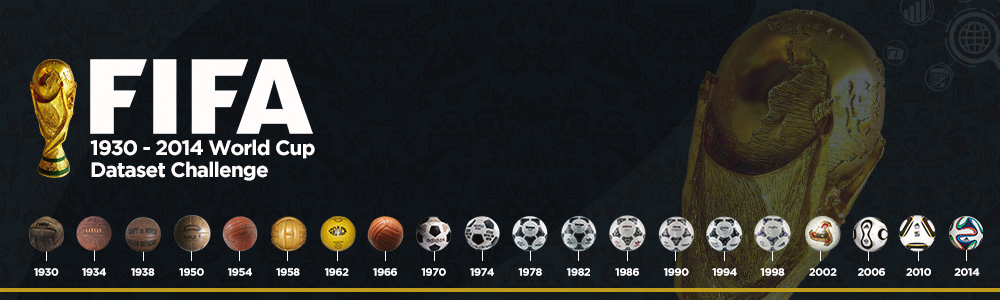

---
## 1. Import Dependencies
---

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
#pd.set_option("display.max_rows", None, "display.max_columns", None)

---
## 2. Import Data and Clean Data
---

In [ ]:
# @hidden_cell
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self):
    return 0

# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_cfe797c727db4319807c64183957de60 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Fg1GCjRs0qF48QcjZehSLYey1Wrokze5gVnV0oKdzUnq', ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'), endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_cfe797c727db4319807c64183957de60.get_object(Bucket='dsdatavisualizationproject-donotdelete-pr-9obdr6no6ukmce',Key='world_cup_results.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"):
    body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df = pd.read_csv(body)
df.head()

In [ ]:
df = df.drop_duplicates(keep =False)
df.tail()

In [ ]:
df.describe()

# Challenge Solutions

---
## How many matches were played each world cup year from 1930?
---

In [ ]:
total_years = Counter(df['Year'])

for k,v in total_years.items():
    print('In', str(k) + ',', 'a total of', v, 'matches were played.', '\n------')


#------------------------------------------------------------------------------#

    
total_matches = pd.DataFrame(columns = ['Years', 'Matches'])
total_matches['Years'] = total_years.keys()
total_matches['Matches'] = total_years.values()

total_matches.plot(kind='barh', x = 'Years', y = 'Matches', figsize = (20, 15), width = 0.7, legend = False)


plt.title('Matches/Year from 1930', fontsize = 20, pad = 30)
plt.ylabel('Years', fontsize = 18)
plt.xlabel('Matches Played', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


for i in range(total_matches['Matches'].count()):
    plt.annotate(str(total_matches['Matches'].loc[i]) + ' Matches', xy = (10, i - 0.1), color = 'w', fontsize = 14)

---
## Total goals scored for each tournament year.
---

In [ ]:
df_goals = df[['Year', 'HomeGoals', 'AwayGoals']]
df_goals = df_goals.groupby(by ='Year').sum(axis=0)
df_goals['Total Goals'] = df_goals.sum(axis = 1)
goals = list(df_goals['Total Goals'])
years = list(total_years.keys())

for i in range(len(goals)):
    print('In', str(years[i]) + ',', 'a total of',  goals[i], 'goals were scored.', '\n------')
    
    
#------------------------------------------------------------------------------#

    
year_goals = pd.DataFrame(columns = ['Years', 'Goals'])
year_goals['Years'] = years
year_goals['Goals'] = goals

year_goals.plot(kind='barh', x = 'Years', y = 'Goals', figsize = (20, 15), width = 0.7, legend = False)


plt.title('Goals/Year from 1930', fontsize = 20, pad = 30)
plt.ylabel('Years', fontsize = 18)
plt.xlabel('Goals Played', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


for i in range(year_goals['Goals'].count()):
    plt.annotate(str(year_goals['Goals'].loc[i]) + ' Goals', xy = (10, i - 0.1), color = 'w', fontsize = 14)

---
## All teams who have reached finals and how many times.
---

In [ ]:
df_finals = df.loc[(df['Round'] == 'Final')]
df_home = df_finals['HomeTeam'].to_list()
df_away = df_finals['AwayTeam'].to_list()

df_final_teams = df_home + df_away
df_final_teams_count = Counter(df_final_teams)

for k,v in df_final_teams_count.items():
    if v == 1:
        print(k, 'have reached the finals', v, 'time.', '\n------')
    if v > 1:
        print(k, 'have reached the finals', v, 'times.', '\n------')
        

    
#------------------------------------------------------------------------------#

    
final_teams = pd.DataFrame(columns = ['Teams', 'Count'])
final_teams['Teams'] = df_final_teams_count.keys()
final_teams['Count'] = df_final_teams_count.values()

final_teams.plot(kind='barh', y = 'Count', x = 'Teams', figsize = (20, 15), width = 0.7, legend = False)


plt.title('Final Appearances/Team from 1930', fontsize = 20, pad = 30)
plt.ylabel('Teams', fontsize = 18)
plt.xlabel('Final Appearances', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


for i in range(final_teams['Teams'].count()):
    plt.annotate('Appearances: ' + str(final_teams['Count'].loc[i]), xy = (0.1, i - 0.1), color = 'w', fontsize = 14)

---
## All teams who have reached semi-finals and how many times.
---

In [ ]:
df_semis = df.loc[(df['Round'] == 'Semi-finals')]
df_shome = df_semis['HomeTeam'].to_list()
df_saway = df_semis['AwayTeam'].to_list()

df_semis_teams = df_shome + df_saway
df_semis_teams_count = Counter(df_semis_teams)

for k,v in df_semis_teams_count.items():
    if v == 1:
        print(k, 'have reached the semi-finals', v, 'time.', '\n------')
    if v > 1:
        print(k, 'have reached the semi-finals', v, 'times.', '\n------')
        
        
    
    
#------------------------------------------------------------------------------#

    
semi_teams = pd.DataFrame(columns = ['Teams', 'Count'])
semi_teams['Teams'] = df_semis_teams_count.keys()
semi_teams['Count'] = df_semis_teams_count.values()

semi_teams.plot(kind='barh', y = 'Count', x = 'Teams', figsize = (30, 20), width = 0.7, legend = False)


plt.title('Semi-Final Appearances/Team from 1930', fontsize = 20, pad = 30)
plt.ylabel('Teams', fontsize = 18)
plt.xlabel('Semi-Final Appearances', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


for i in range(semi_teams['Teams'].count()):
    plt.annotate('Appearances: ' + str(semi_teams['Count'].loc[i]), xy = (0.1, i - 0.1), color = 'w', fontsize = 14)

---
## Goals and average goals;
---
1. How many goals and average goals scored in all semi-finals.
2. How many goals and average goals scored in all quarter-finals.
3. How many goals and average number scored in all finals

In [ ]:
def avg_goals(round):
    df_round = df.loc[(df['Round'] == round)]
    df_round = df_round[['Year', 'HomeGoals', 'AwayGoals']]
    df_round_goals = df_round.groupby(by ='Year').sum(axis=0)
    df_round_goals['Total Goals'] = df_round_goals[['HomeGoals', 'AwayGoals']].sum(axis =1)
    #print(df_round_goals.head())
    
    totalGames = df_round['Year'].count()
    totalGoals = df_round_goals['Total Goals'].sum()
    #print(totalGoals)
    avgGoals = totalGoals/totalGames
    #print(avgGoals)
   
    return avgGoals, totalGoals

In [ ]:
ko_goals = {}
ko_stages = ['Quarter-finals', 'Semi-finals', 'Final']
for each in ko_stages:
    result = avg_goals(each)
    
    print('Total Goals in', each, ':', result[1], 'goals.')
    print('Average Goals per Game in', each, ':', '{0:.2f}'.format(result[0]), 'goals/game.', '\n------')
    
    ko_goals[result[1]] = round(result[0], 2)
    
#------------------------------------------------------------------------------#

    
ko_data = pd.DataFrame(columns = ['Goals', 'Average Goals', 'Knockout Stage'])
ko_data['Goals'] = ko_goals.keys()
ko_data['Average Goals'] = ko_goals.values()
ko_data['Knockout Stage'] = ko_stages

ko_data.plot(kind='barh', y = 'Goals', x = 'Knockout Stage', figsize = (15, 10), width = 0.4, legend = False)


plt.title('Goals and Average Goals', fontsize = 20, pad = 30)
plt.ylabel('Knockout Stage', fontsize = 18)
plt.xlabel('Goals', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


for i in range(ko_data['Goals'].count()):
    plt.annotate('Average Goals: ' + str(ko_data['Average Goals'].loc[i]) + ' goals/game', xy = (10, i - 0.03), color = 'w', fontsize = 14)

---
## How many matches were played outside quarter-finals and above.
---

In [ ]:
df_stages = set(df['Round'].unique())
quarters = set(['Quarter-finals', 'Semi-finals', 'Final', 'Match for third place', 'Third place' ])
df_stages = list(df_stages - quarters)
#print(df_stages)

In [ ]:
def stage_games(stages):
    total_games = 0
    for each in stages:
        df_games = df.loc[(df['Round'] == each)].count()
        df_games = df_games['Round']
        total_games += df_games
            
    return total_games

In [ ]:
games = stage_games(df_stages)
print('Total Number of Games Played Outside Q/F and Above: ' +str(games) + '.')

---
# Kicker
---
Two new columns for each of the outcome of every match stating:
<br>
1. outcome = D for Draw, A for AwayTeam Wins, H for HomeTeam wins.
2. Winner of each game: 'Draw' if no winner.

In [ ]:
df_result = df[['Year', 'HomeTeam', 'HomeGoals', 'AwayGoals', 'AwayTeam']]
df_result

games = len(df_result)

result = []
outcome = []

for i in range(games):
    
    if (df['HomeGoals'].loc[i] > df['AwayGoals'].loc[i]):
        winner = 'H'
        result.append(winner)
        team = df['HomeTeam'].loc[i]
        outcome.append(team)
   
        
    elif df['HomeGoals'].loc[i] < df['AwayGoals'].loc[i]:
        winner = 'A'
        result.append(winner)
        team = df['AwayTeam'].loc[i]
        outcome.append(team)
        
    
    elif (df['HomeGoals'].loc[i] == df['AwayGoals'].loc[i]) and (df['AwayGoals'].loc[i]) == 0:
        winner = 'D'
        result.append(winner)
        outcome.append('Draw')      
    
    
    elif (df['HomeGoals'].loc[i] == df['AwayGoals'].loc[i]) and (df['AwayGoals'].loc[i])> 0:
        winner = 'A' #AwayGoalsRule
        result.append(winner)
        team = df['AwayTeam'].loc[i]
        outcome.append(team)     
        

#print(result)
#print(outcome)
df['Outcome'] = pd.DataFrame(result)
df['Winner'] = pd.DataFrame(outcome)

# Final Table With Kicker

In [ ]:
df

In [ ]:
df.loc[df['HomeGoals'] == df['AwayGoals']]